In [1]:
import numpy as np

# Constants for dimensions
BATCH, SEQ, HEADS, DEPTH = 0, 1, 2, 3

def softmax(x, axis=-1):
    e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return e_x / np.sum(e_x, axis=axis, keepdims=True)

def multi_head_attention(Q, K, V, num_heads):
    batch_size, seq_len, d_model = Q.shape
    assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
    depth = d_model // num_heads

    # 1) Linear projections for Q, K, V
    W_q = np.random.randn(d_model, d_model)
    W_k = np.random.randn(d_model, d_model)
    W_v = np.random.randn(d_model, d_model)
    W_o = np.random.randn(d_model, d_model)

    Q_proj = Q @ W_q    # (batch, seq_len, d_model)
    K_proj = K @ W_k
    V_proj = V @ W_v

    # 2) Split heads
    def split_heads(x):
        # TODO: reshape x to (batch, num_heads, seq_len, depth)
        batch_size, seq_len, d_model = x.shape
        # 변수명은 값, 상수는 순서
        x = x.reshape(batch_size, seq_len, num_heads, depth) # 이 부분을 완성하세요

        return x.transpose(BATCH, HEADS, SEQ, DEPTH)

    Qh = split_heads(Q_proj)
    Kh = split_heads(K_proj)
    Vh = split_heads(V_proj)

    # 3) Scaled Dot-Product Attention per head
    scores = Qh @ Kh.transpose(BATCH, SEQ, DEPTH, HEADS)  # (batch, heads, seq_len, seq_len)
    scores /= np.sqrt(depth)
    weights = softmax(scores, axis=-1)   # (batch, heads, seq_len, seq_len)
    head_out = weights @ Vh              # (batch, heads, seq_len, depth)

    # 4) Concatenate heads
    def combine_heads(x):
        # TODO: reshape x back to (batch, seq_len, d_model)
        batch_size, num_heads, seq_len, depth = x.shape
        x = x.transpose(BATCH, SEQ, HEADS, DEPTH)  # (batch, seq_len, heads, depth)

        return x.reshape(batch_size, seq_len, num_heads * depth) # 이 부분을 완성하세요

    concat = combine_heads(head_out)

    # 5) Final linear projection
    output = concat @ W_o                # (batch, seq_len, d_model)
    return output, weights

In [2]:
# Usage example
if __name__ == "__main__":
    batch, seq_len, d_model, heads = 1, 6, 16, 4
    Q = np.random.randn(batch, seq_len, d_model)
    K = np.random.randn(batch, seq_len, d_model)
    V = np.random.randn(batch, seq_len, d_model)

    out, attn_weights = multi_head_attention(Q, K, V, heads)
    print("Output shape:", out.shape)
    print("Attention weights shape:", attn_weights.shape)

Output shape: (1, 6, 16)
Attention weights shape: (1, 4, 6, 6)


Output shape: (1, 6, 16)
Attention Weights shape: (1, 4, 6, 6)


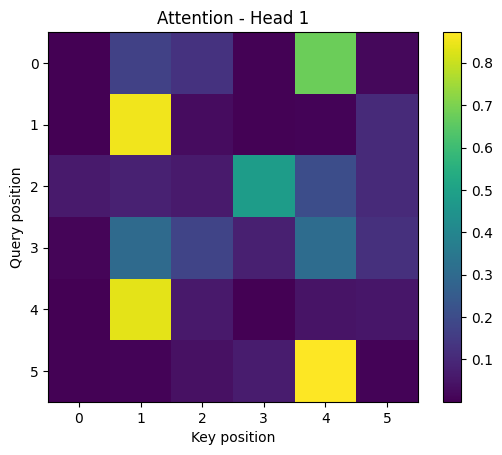

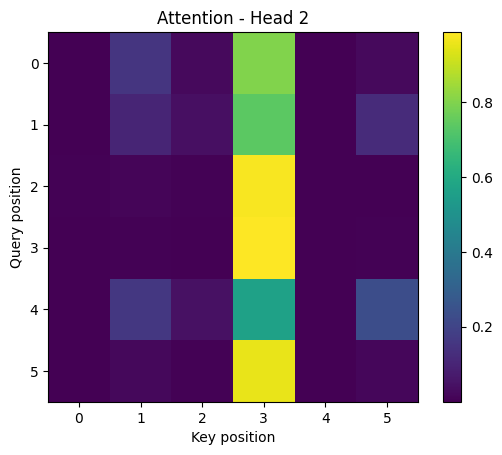

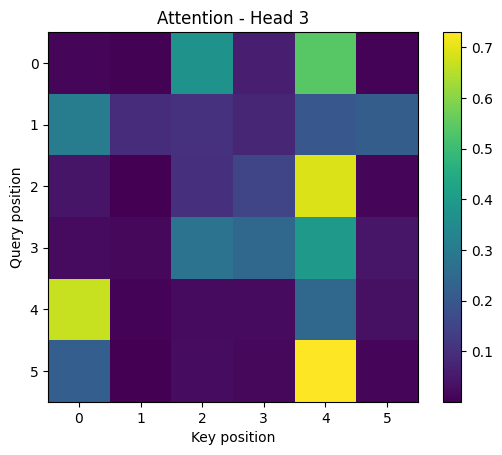

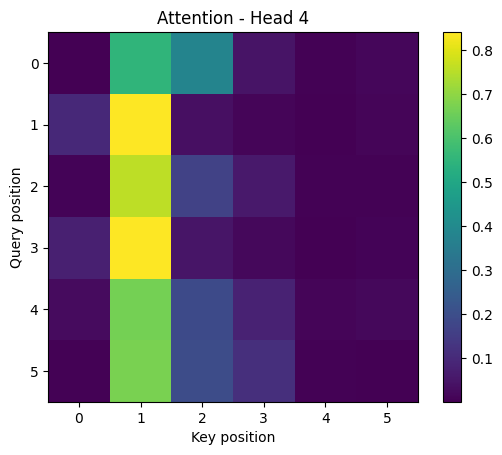

In [3]:
import numpy as np
import matplotlib.pyplot as plt

batch, seq_len, d_model, heads = 1, 6, 16, 4

Q = np.random.rand(batch, seq_len, d_model)
K = np.random.rand(batch, seq_len, d_model)
V = np.random.rand(batch, seq_len, d_model)

# Correct unpacking
output, attention_weights = multi_head_attention(Q, K, V, heads)

# Print shapes
print("Output shape:", output.shape)
print("Attention Weights shape:", attention_weights.shape)

# Plot attention
def plot_attention(weights, title="Attention"):
    heads = weights.shape[1]
    for h in range(heads):
        plt.figure()
        plt.imshow(weights[0, h], cmap='viridis')
        plt.title(f'{title} - Head {h+1}')
        plt.xlabel("Key position")
        plt.ylabel("Query position")
        plt.colorbar()
        plt.show()

plot_attention(attention_weights)

